In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ntr-arogya-seva-2017:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F60437%2F117242%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240519%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240519T073116Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D375a2d8bd5f6285b7688407902a920dc0a26de8c049a53ac396a2fabe65a5e70d323f736d39d477123fb18edd19ed4b055d95a385b854a293b190c5c72a2202861823c535f2a6b70e11a7738fdf520305f81b22f8579ddf15e02906f61c0d5928f2e66a9debe9b6cf3c9ead7184cca7e25f7e5103249c5ba47db1f0996d6d1e71f4965991e226848005584a17c7491f2caa78efdec042406da0dbabf88da675e50c193ee73b13f363bb99338fcce72201e04aeb10f038bcc907a8f0451dba166e1993992f3f5a8583e2697cbd482fc59a351ee429123c3d2bd4f0f3080640dccdf3c2966658a79699d3632bf732a030e4c20726ed3e215810f66fae1ad196cc1'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 25203778 bytes downloaded
Downloaded and uncompressed: ntr-arogya-seva-2017
Data source import complete.


## Analyze Healthcare Data
Now, let’s import all the necessary libraries that we need to analyze the healthcare data with python:

In [ ]:
# import requisite libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Now let’s read the data and have a quick look at some initial rows from the data:

data = pd.read_csv("../input/ntr-arogya-seva-2017/ntrarogyaseva.csv")
data.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D


In [ ]:
# print summary statistics
data.describe(include='all')

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
count,479688.000000,479688.000000,479688,479688,479688,479688,479688,479688,479688,479688,...,479688.000000,479688,479688,479688,479688,479688,475128,479688,10122,479688
unique,NaN,NaN,6,6,29,29,925,923,11801,711,...,NaN,467,2,61,20,937,918,2,740,4
top,NaN,NaN,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-1,Visakhapatnam,...,NaN,Sri Venkateswara Institute Of Medical Sciences,C,VISAKHAPATNAM,Guntur,13/02/2017 00:00:00,29/05/2017 00:00:00,NO,04/01/2017 00:00:00,D
freq,NaN,NaN,260718,246164,74947,74947,65378,65378,3277,9264,...,NaN,21854,369346,50715,60988,1602,1764,469566,40,437948
mean,239844.500000,44.912264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27652.205861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,138474.142301,18.961084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25951.706037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,119922.750000,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,239844.500000,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,359766.250000,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now to analyze this healthcare data in a better way we need to first look at how is the data distributed into columns. So let’s have a quick look at the columns of the dataset:

In [ ]:
# display all the column names in the data
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

## Data Exploration
value_counts () is a Pandas function that can be used to print data distributions (in the specified column). Let’s start by checking the gender statistics of the data:

In [ ]:
# Display the counts of each value in the SEX column
data['SEX'].value_counts()

SEX
Male             260718
Female           178947
Male(Child)       25068
Female(Child)     14925
FEMALE               21
MALE                  9
Name: count, dtype: int64

It appears that there are duplicate values ​​in this column. Male and MALE are not two different sexes. We can substitute the column names to resolve this issue. I will also rename Male (Child) -> Boy and Female (Child) -> Girl for convenience:

In [ ]:
# mappings to standardize and clean the values
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}
# replace values using the defined mappings
data['SEX'] = data['SEX'].replace(mappings)
data['SEX'].value_counts()

SEX
Male      260727
Female    178968
Boy        25068
Girl       14925
Name: count, dtype: int64

Viewing the above distribution can be done easily using Pandas’ built-in plot feature:

<Axes: xlabel='SEX'>

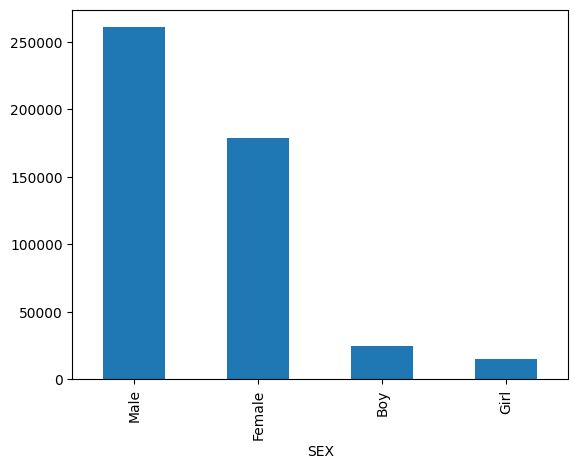

In [ ]:
# plot the value counts of sex
data['SEX'].value_counts().plot.bar()

In [ ]:
# print the mean, median and mode of the age distribution
print("Mean: {}".format(data['AGE'].mean()))
print("Median: {}".format(data['AGE'].median()))
print("Mode: {}".format(data['AGE'].mode()))

Mean: 44.91226380480646
Median: 47.0
Mode: 0    0
Name: AGE, dtype: int64


Top 10 current ages of data. Do not hesitate to play by replacing 10 with the number of your choice:

In [ ]:
# print the top 10 ages
data['AGE'].value_counts().head(10)

AGE
0     17513
50    16191
55    15184
45    15052
60    13732
46    12858
56    12590
51    12470
40    11962
65    11878
Name: count, dtype: int64

Boxplots are commonly used to visualize a distribution when bar charts or point clouds are too difficult to understand:

<Axes: ylabel='AGE'>

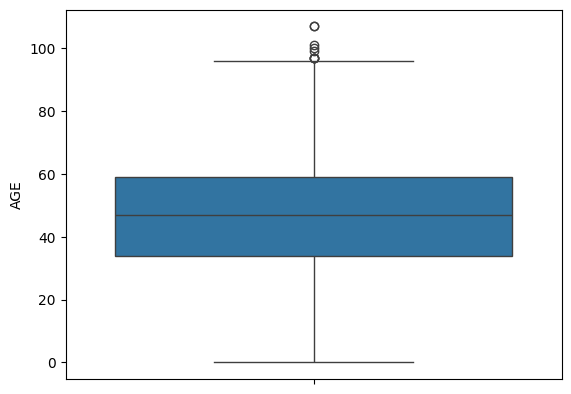

In [ ]:
# better looking boxplot (using seaborn) for age variable
sns.boxplot(data['AGE'])

## Analyze Healthcare Data Deeply
What if I wanted to analyze only the records relating to Krishna district? I should select a subset of data to continue. Fortunately, Pandas can help us do this too, in two steps: 1. Condition to be satisfied: data [‘DISTRICT_NAME’] == ‘Krishna’ 2. Insertion of the condition in the dataframe: data [data [‘DISTRICT_NAME’] == “Krishna”]:

In [ ]:
# subset involving only records of Krishna district
data[data['DISTRICT_NAME']=='Krishna'].head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
30,31,42,Female,OC,S12,MEDICAL ONCOLOGY,S12.26.1,Chemotherapy for Acute Myeloid Leukemia with I...,Ward-1,Vijayawada,...,60000,Nims Hospitals,G,HYDERABAD,Hyderabad,06/08/2014 00:00:00,01/09/2014 00:00:00,NO,NaN,D
56,57,52,Male,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ward-26,Vijayawada,...,25000,OZONE HOSPITALS,C,HYDERABAD,Ranga Reddy,28/10/2014 00:00:00,06/11/2014 00:00:00,NO,NaN,D
58,59,17,Female,SC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.10.1,Mitral Valve Replacement (With Valve),Atapaka,Kaikalur,...,135000,Karumuri Hospital,C,GUNTUR,Guntur,04/11/2014 00:00:00,12/11/2014 00:00:00,NO,NaN,D
97,98,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,...,10000,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,08/04/2015 00:00:00,NaN,YES,03/05/2015 00:00:00,P
111,112,65,Male,OC,M7,NEUROLOGY,M7.4,Medical Management of Ischemic Strokes,Chilakalapudi (R),Machilipatnam,...,10000,Rims General Hospital,G,KADAPA,YSR Kadapa,28/05/2015 00:00:00,01/06/2015 00:00:00,NO,NaN,D


Now, if we want the most common surgery, at the district level, this can be done by going through all the district names and selecting the data subset for that district:

In [ ]:
# Most common surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("District: {}nDisease and Count: {}".format(i,data[data['DISTRICT_NAME']==i]['SURGERY'].value_counts().head(1)))

District: SrikakulamnDisease and Count: SURGERY
Maintenance Hemodialysis For Crf    3970
Name: count, dtype: int64
District: KurnoolnDisease and Count: SURGERY
Surgical Correction Of Longbone Fracture    2943
Name: count, dtype: int64
District: VizianagaramnDisease and Count: SURGERY
Surgical Correction Of Longbone Fracture    2754
Name: count, dtype: int64
District: GunturnDisease and Count: SURGERY
Surgical Correction Of Longbone Fracture    5259
Name: count, dtype: int64
District: VishakhapatnamnDisease and Count: SURGERY
Maintenance Hemodialysis For Crf    5270
Name: count, dtype: int64
District: West GodavarinDisease and Count: SURGERY
Maintenance Hemodialysis For Crf    5478
Name: count, dtype: int64
District: KrishnanDisease and Count: SURGERY
Maintenance Hemodialysis For Crf    6026
Name: count, dtype: int64
District: East GodavarinDisease and Count: SURGERY
Surgical Correction Of Longbone Fracture    6998
Name: count, dtype: int64
District: PrakasamnDisease and Count: SURGERY


We note that only two surgeries dominate all the districts: Dialysis (7 districts) Long bone fracture (6 districts).

Now, let’s have a look at the average claim amount district wise:

In [ ]:
# Average claim amount for surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("District: {}nAverage Claim Amount: ₹{}".format(i,data[data['DISTRICT_NAME']==i]['CLAIM_AMOUNT'].mean()))

District: SrikakulamnAverage Claim Amount: ₹25593.712618634367
District: KurnoolnAverage Claim Amount: ₹28598.91853309593
District: VizianagaramnAverage Claim Amount: ₹25097.78006899492
District: GunturnAverage Claim Amount: ₹31048.73950729927
District: VishakhapatnamnAverage Claim Amount: ₹25977.94638304871
District: West GodavarinAverage Claim Amount: ₹27936.70608610806
District: KrishnanAverage Claim Amount: ₹31015.383233247547
District: East GodavarinAverage Claim Amount: ₹26166.136719737173
District: PrakasamnAverage Claim Amount: ₹28655.81036215859
District: NellorenAverage Claim Amount: ₹26105.122376744654
District: YSR KadapanAverage Claim Amount: ₹27945.216899192998
District: ChittoornAverage Claim Amount: ₹25708.102690948628
District: AnantapurnAverage Claim Amount: ₹27664.166978581827


Now let’s look at the surgery statistics to analyze this healthcare data. I will use the Pandas GroupBy concept to collect statistics by grouping data by category of surgery. The Pandas groupby works similarly to the SQL command of the same name:

Cochlear implant surgery appears to be the most expensive surgery, costing an average of ₹ 520,000. Prostheses cost ₹ 1,200, the cheapest. The youngest age group is also that of cochlear implant surgery: 1.58 years, while neurology has an average age of 56 years.

In [ ]:
sns.countplot(data['AGE'])
